In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version 0.0.3


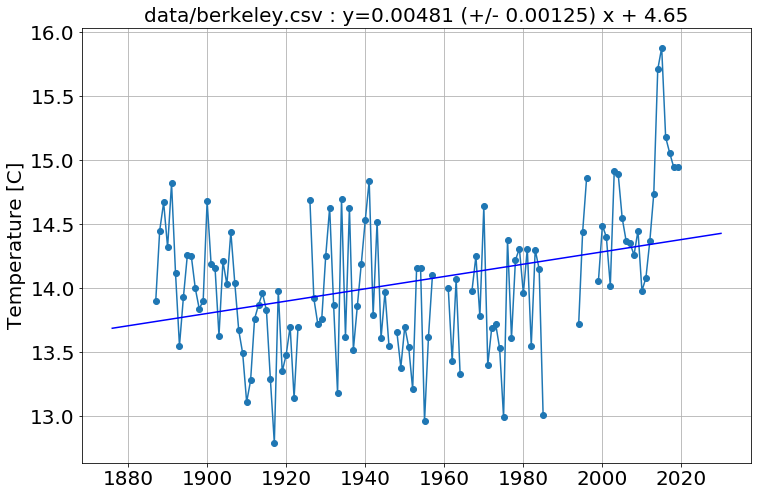

In [3]:
filename='data/berkeley.csv'
data=pd.read_csv(filename)

x=array(data['YEAR'])
y=array(data['metANN'])
y[y==999.9]=nan

model=ols('y ~ x', data={'y':y,'x':x})
results=model.fit()

xx=linspace(min(x)-10,max(x)+10,20)
yy=results.predict({'x':xx})

m=results.params['x']
mσ=results.bse['x']

b=results.params['Intercept']

plot(x,y,'-o')
ylabel('Temperature [C]')
title(filename+" : y=%.3g (+/- %.4g) x + %.3g" % (m,mσ,b))
plot(xx,yy,'b-')

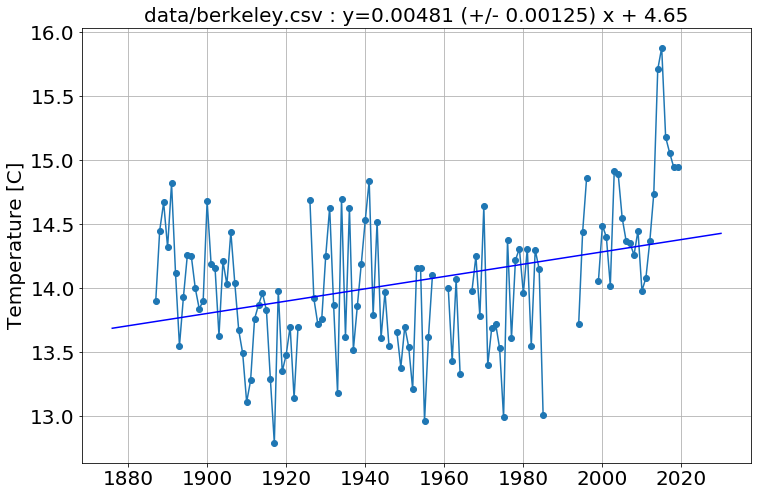

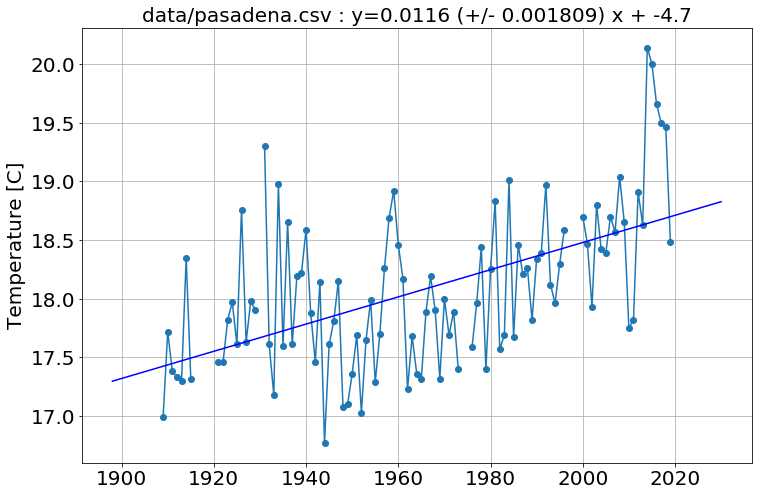

In [5]:
for filename in ['data/berkeley.csv','data/pasadena.csv']:
    data=pd.read_csv(filename)

    x=array(data['YEAR'])
    y=array(data['metANN'])
    y[y==999.9]=nan

    model=ols('y ~ x', data={'y':y,'x':x})
    results=model.fit()

    xx=linspace(min(x)-10,max(x)+10,20)
    yy=results.predict({'x':xx})

    m=results.params['x']
    mσ=results.bse['x']

    b=results.params['Intercept']

    figure()
    plot(x,y,'-o')
    ylabel('Temperature [C]')
    title(filename+" : y=%.3g (+/- %.4g) x + %.3g" % (m,mσ,b))
    plot(xx,yy,'b-')

In [6]:
from glob import glob

In [10]:
filenames=glob('data/*.csv')
filenames

['data/pasadena.csv', 'data/berkeley.csv', 'data/linear_data.csv']

In [12]:
filenames=filenames[:2]
filenames

['data/pasadena.csv', 'data/berkeley.csv']

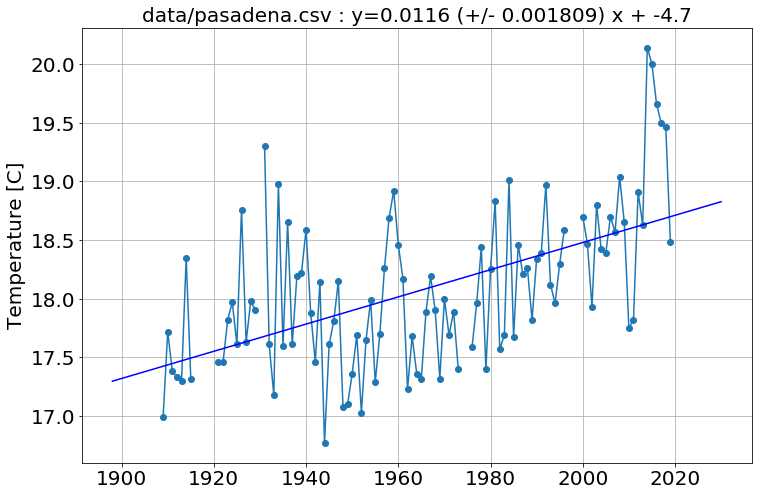

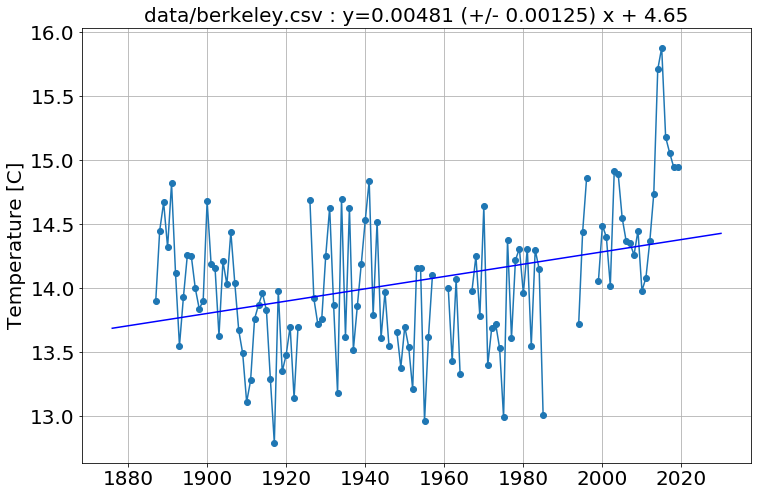

In [14]:
for filename in filenames:
    data=pd.read_csv(filename)

    x=array(data['YEAR'])
    y=array(data['metANN'])
    y[y==999.9]=nan

    model=ols('y ~ x', data={'y':y,'x':x})
    results=model.fit()

    xx=linspace(min(x)-10,max(x)+10,20)
    yy=results.predict({'x':xx})

    m=results.params['x']
    mσ=results.bse['x']

    b=results.params['Intercept']

    figure()
    plot(x,y,'-o')
    ylabel('Temperature [C]')
    title(filename+" : y=%.3g (+/- %.4g) x + %.3g" % (m,mσ,b))
    plot(xx,yy,'b-')

In [21]:
slopes={}
slope_sigmas={}
significant_trend={}

for filename in filenames:
    data=pd.read_csv(filename)

    x=array(data['YEAR'])
    y=array(data['metANN'])
    y[y==999.9]=nan

    model=ols('y ~ x', data={'y':y,'x':x})
    results=model.fit()

    xx=linspace(min(x)-10,max(x)+10,20)
    yy=results.predict({'x':xx})

    m=results.params['x']
    mσ=results.bse['x']

    b=results.params['Intercept']

    
    slopes[filename]=m
    slope_sigmas[filename]=mσ
    
    
    if m>0:
        if (m-2*mσ)>0:
            significant_trend[filename]=True
        else:
            significant_trend[filename]=False
            
            
            

In [22]:
slopes

{'data/pasadena.csv': 0.01159089741802095,
 'data/berkeley.csv': 0.00481475275752638}

In [23]:
slope_sigmas

{'data/pasadena.csv': 0.001809404996742347,
 'data/berkeley.csv': 0.001250252370314273}

In [24]:
significant_trend

{'data/pasadena.csv': True, 'data/berkeley.csv': True}

## linspace

In [25]:
linspace(0,10,11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [26]:
linspace(0,10,101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [27]:
linspace(30,40,101)

array([30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. ,
       31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1,
       32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33. , 33.1, 33.2,
       33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3,
       34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4,
       35.5, 35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36.3, 36.4, 36.5,
       36.6, 36.7, 36.8, 36.9, 37. , 37.1, 37.2, 37.3, 37.4, 37.5, 37.6,
       37.7, 37.8, 37.9, 38. , 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7,
       38.8, 38.9, 39. , 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8,
       39.9, 40. ])

In [28]:
linspace(0,5,17)

array([0.    , 0.3125, 0.625 , 0.9375, 1.25  , 1.5625, 1.875 , 2.1875,
       2.5   , 2.8125, 3.125 , 3.4375, 3.75  , 4.0625, 4.375 , 4.6875,
       5.    ])

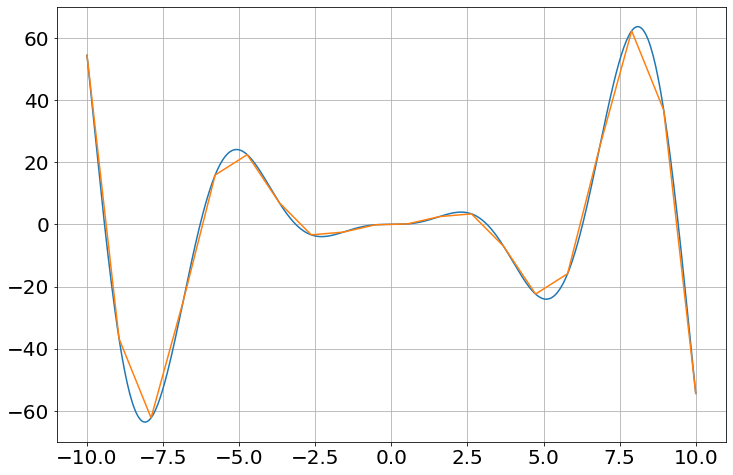

In [30]:
x=linspace(-10,10,500)
y=x**2*sin(x)
plot(x,y)

x=linspace(-10,10,20)
y=x**2*sin(x)
plot(x,y)

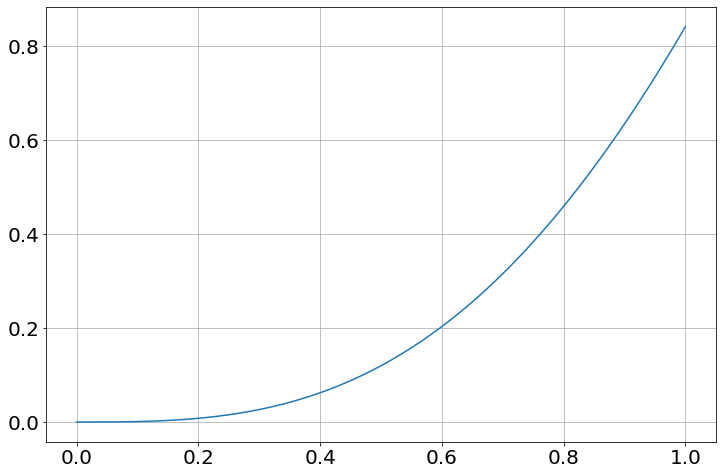

In [31]:
x=linspace(0,1,500)
y=x**2*sin(x)
plot(x,y)


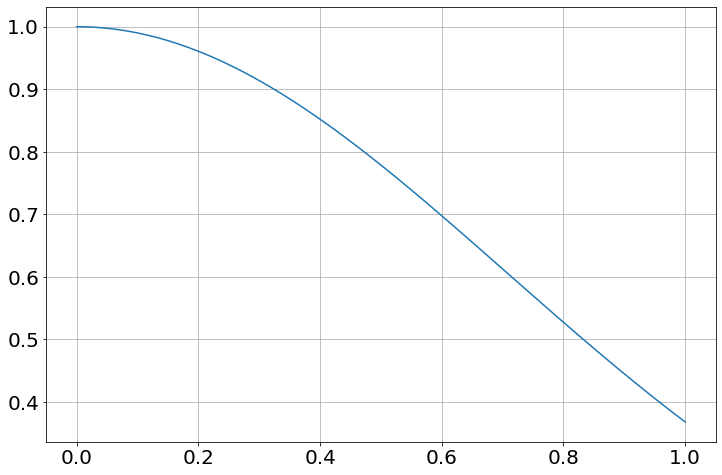

In [32]:
x=linspace(0,1,500)
y=exp(-x**2)
plot(x,y)


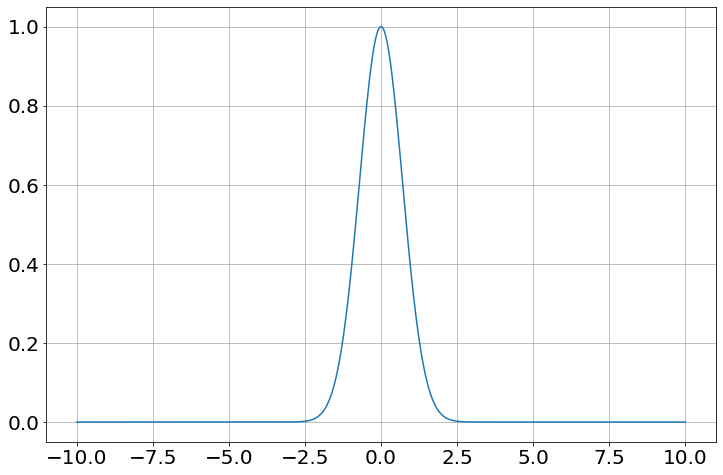

In [35]:
x=linspace(-10,10,500)
dx=x[1]-x[0]


y=exp(-x**2)
plot(x,y)


normalized means

$$
\int_{-\infty}^{+\infty} y(x) dx = 1
$$

In [38]:
sum(y*dx)

1.7724538509055376

In [39]:
y=y/sum(y*dx)  # this normalizes it

In [40]:
sum(y*dx)

0.9999999999999998

In [41]:
sum(y[x>1]*dx)

0.07820676549092746

# do a half-normal

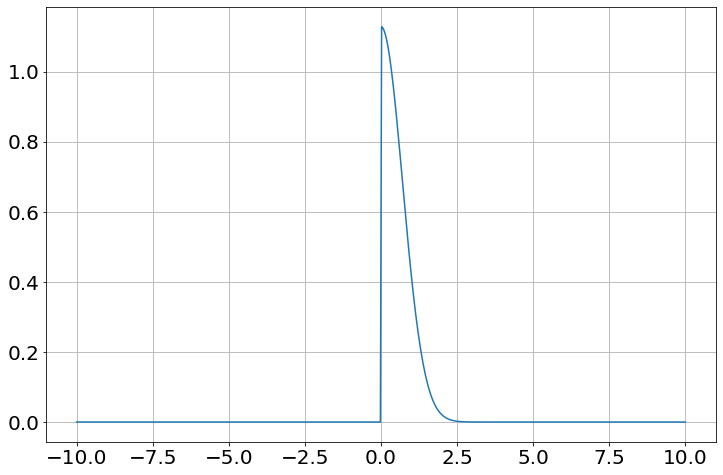

In [42]:
x=linspace(-10,10,500)
dx=x[1]-x[0]

y=exp(-x**2)
y[x<0]=0
y=y/sum(y*dx)  # this normalizes it


plot(x,y)


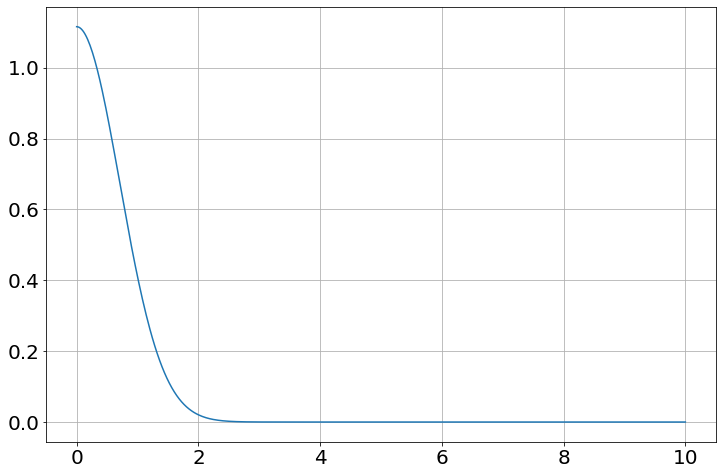

In [43]:
x=linspace(0,10,500)
dx=x[1]-x[0]

y=exp(-x**2)
y=y/sum(y*dx)  # this normalizes it


plot(x,y)
